## Рабочая тетрадь 4
### 1.1.1
Проведем прямую y = mx + b  через экспериментальные точки.

In [5]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем лин. ур-е y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
# Построим A по x:

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [6]:
# Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


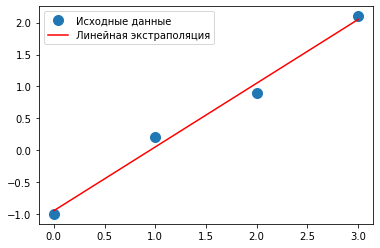

In [7]:
# Построим график полученной прямой и укажем нанем ночки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label="Исходные данные", markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

### 1.1.2
Пусть x,y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома a,b,c по методу наименьших квадратов. Данные могут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [8]:
from numpy import *
from numpy.random import *
# generate random x, y
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta*(rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
# data to file
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [9]:
# read from files
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-4.63157464 -3.7965628  -3.31535614 -2.2797435  -1.46373963  0.41521402
  1.27524234  1.62234537  2.59163859  3.93854669  4.95942787]
[24.79368791 16.32618956  9.10317765  4.04320428  0.79570493  0.35110779
  1.37330008  3.96917872  9.10414336 15.97366116 24.80529579]


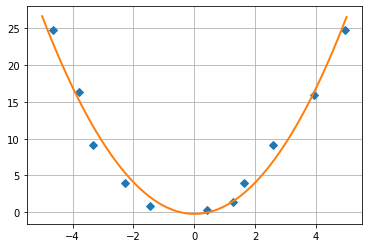

In [10]:
# Нахождение коэф-ов ф-ии вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T

# находим коэф-ы при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond= None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x, y, "D") #D - dot

# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=2)
plt.grid()
plt.savefig('парабола.png')

### 1.1.3
По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

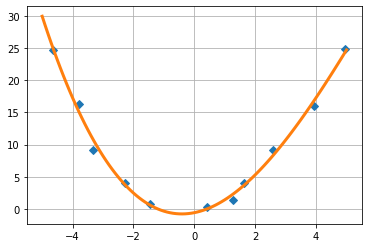

In [11]:
# Нахождение коэф-ов ф-ии вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x**2, x, E]
m = vstack((x**3, x**2, x, ones(11))).T

# находим коэ-фы при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэф-ы s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], "-", lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

In [12]:
# Случайные данные

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([30, 50, 80, 160, 300, 580])

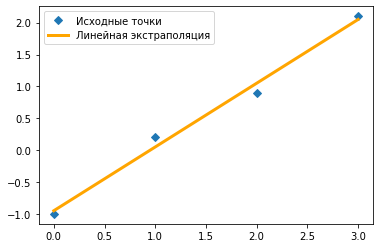

Коэф-ы полинома:  1.0 -0.95
Исходные y: -1.0 0.2 0.9 2.1
Полученные y:  -0.95 0.05 1.05 2.05
MSE:  0.012499999999999989


In [64]:
# y = kx + b; y = ms
from sklearn.metrics import mean_squared_error
m = vstack((x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

plt.plot(x, y, "D", label='Исходные точки')
plt.plot(x, s[0] * x + s[1], 'orange',lw=3, label='Линейная экстраполяция')
plt.legend()
plt.show()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x + s[1]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x + s[1]))

Коэф-ы полинома:  31.071 -53.071 47.857
Исходные y: 30 50 80 160 300 580
Полученные y:  47.857 25.857 66.0 168.286 332.714 559.286
MSE:  444.28571428571377


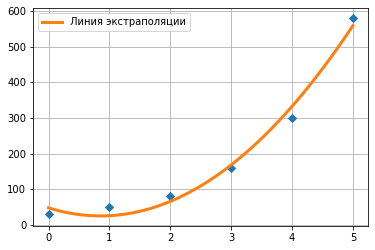

In [14]:
# y = ax^2 + bx + c; y = ms
from sklearn.metrics import mean_squared_error

m = vstack((x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [0, 5]
x_prec = linspace(0, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^2 + bx + d, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
#mean_squared_error(y, x*)
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**2 + s[1] * x + s[2]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x**2 + s[1] * x + s[2]))

Коэф-ы полинома:  6.296 -16.151 33.188 28.968
Исходные y: 30 50 80 160 300 580
Полученные y:  28.968 52.302 81.111 153.175 306.27 578.175
MSE:  16.137566137566047


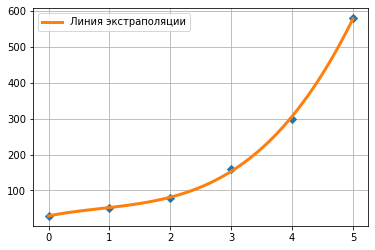

In [15]:
# y = ax^3 + bx^2 + cx + d; y = ms

m = vstack((x**3, x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [0, 5]
x_prec = linspace(0, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэф-ы s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**3 + s[1] * x**2 + s[2] * x + s[3]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x**3 + s[1] * x**2 + s[2] * x + s[3]))

### 1.1.4
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида f(x,b) = b_0  + b_1 exp(-b2x^2)

In [16]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэф-и b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

In [17]:
# Используем ф-ю для получения решения в виде коэф-ов ф-ии f(x) для указаных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.23585639, 0.75397956, 0.44931986])

In [18]:
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0001635279427059253
0.0874480504671199


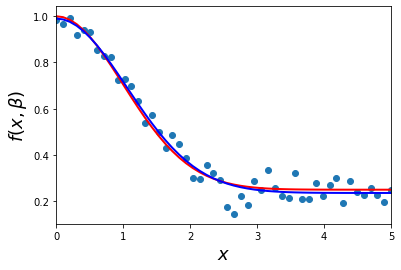

In [19]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### 1.1.5
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида: 
#### f(x,b) = b_0  + b_1 x 
#### f(x,b) = b_0  + b_1 x + b_2 x^2 
#### f(x,b) = b_0  + b_1 ln(x) 
#### f(x,b) = b_0   x^(b_1 )   


In [20]:
# 1
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.25576984 0.75212858]
0.00011057997371597482
0.09723411416654863


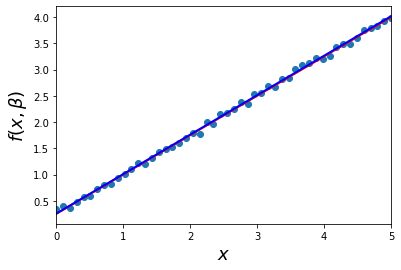

In [21]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [22]:
# 2
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.2401297  0.75804045 0.4991587 ]
0.00012476173506821033
0.10403822030204807


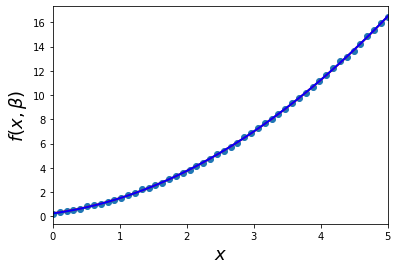

In [23]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [24]:
# 3
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.99941139 2.01004166]
4.972479218092238e-05
0.11498566952192008


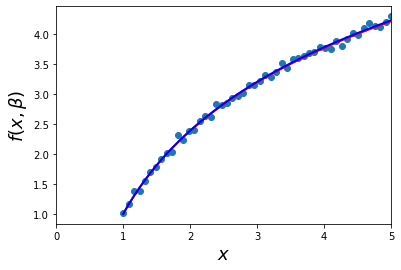

In [25]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [26]:
# 4
# Добавим шума в данные, сделанные по ф-ии f(x, b) с коэф-ми b = (0.25, 0.75)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x**b1

# зададим массив точек xi
xdata = np.linspace(1, 5, 50)

# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.01210252 1.99933262]
0.00013235341899422656
0.1475942967082563


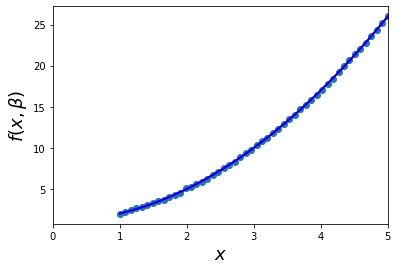

In [27]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### 1.2.1
Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# создадим набор данных для описания взаимосвязи между времени обучения студентов и успевамостью
my_dict = {"Учебное время": [0.50, 0.75, 1., 1.25, 1.50, 1.75, 1.75, 2.0, 2.25, 2.50, 2.75, 3.00, 3.25,
                            3.50, 4.00, 4.25, 4.50, 4.75, 5.0, 5.50],
          "Оценка": [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [30]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


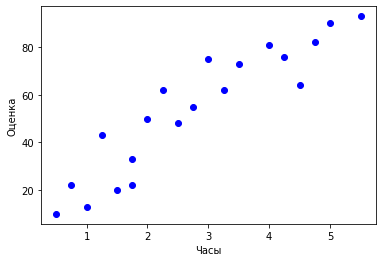

In [31]:
# Нарисуем точечную диаграмму
plt.scatter(dataset["Учебное время"], dataset["Оценка"], color='b', label="данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
regressor =  LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


In [36]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


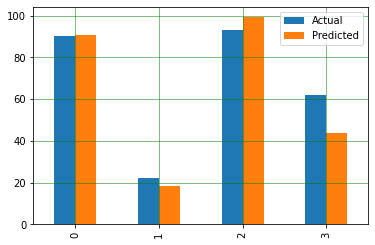

In [37]:
# визуализирцуем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

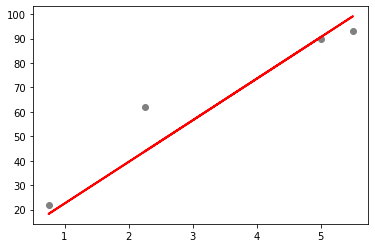

In [38]:
# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Задание
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.


In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')

In [40]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [41]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [42]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test).reshape(1, -1)
# сравним фактические значения с прогнозируемыми
data = pd.DataFrame({"Actual": y_test,
                   "Predicted":pd.Series(*y_pred)})
data

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [44]:
print(regressor.intercept_)
print(regressor.coef_)

26780.099150628186
[9312.57512673]


### 1.3.1
Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [45]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose to input vectors
X = np.c_[X, np.ones(X.shape[0])] #add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


### 1.3.2
Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)

new_x = np.array(X)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns =  {0:'y'}, inplace=False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat(frames, axis=1, join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [48]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [49]:
# разделим данные на метки и атрибуты
X = dataset[["x1", 'x2', 'x3']]
y = dataset['y']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
regressor = LinearRegression().fit(X_train, y_train)

In [52]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [53]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [54]:
# MSE
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


### Задание
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [56]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = LinearRegression().fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-32.003954
Average_income,-0.075188
Paved_Highways,-0.002137
Population_Driver_licence(%),1355.827606


In [58]:
y_pred = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
33,628,621.250921
23,547,463.618291
38,648,727.431022
36,640,646.094665
2,561,585.209891
3,414,486.869741
31,554,587.673738
26,577,597.031210
44,782,702.923921
27,631,617.312283


In [59]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 2721.6159571932194


   ## Задание* 
   ## Вариант 3
Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета. 
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.


In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные из 3 варианта
x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

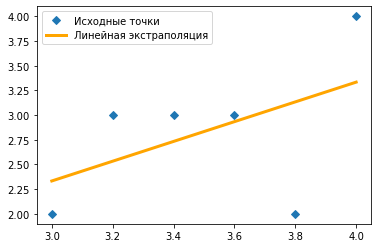

Коэф-ы полинома:  1.0 -0.667
Исходные y: 2.0 3.0 3.0 3.0 2.0 4.0
Полученные y:  2.333 2.533 2.733 2.933 3.133 3.333
MSE:  0.35555555555555546


In [61]:
# Полином первой степени

# y = kx + b = sA, где A = [[x, 1]], s = [k, b]
A = np.vstack([x, np.ones(len(x))]).T
s = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, "D", label='Исходные точки')
plt.plot(x, s[0] * x + s[1], 'orange',lw=3, label='Линейная экстраполяция')
plt.legend()
plt.show()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x + s[1]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x + s[1]))

Коэф-ы полинома:  0.446 -2.125 4.75
Исходные y: 2.0 3.0 3.0 3.0 2.0 4.0
Полученные y:  2.393 2.521 2.686 2.886 3.121 3.393
MSE:  0.35357142857142826


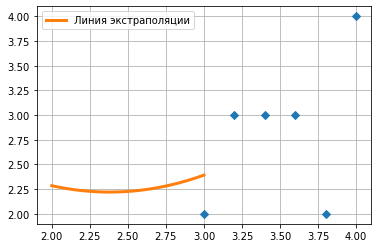

In [62]:
# Полином второй степени

# y = a_2 * x^2 + a_1 * x + a_0 = sA, где A = [[x^2, x, 1]], s = [a, b, c]
A = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(A, y, rcond=None)[0]

# на отрезке [2, 3]
x_prec = linspace(2, 3, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = a_1 * x^2 + a_2 * x + a_3, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
#mean_squared_error(y, x*)
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**2 + s[1] * x + s[2]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x**2 + s[1] * x + s[2]))

### Решение вручную

1) Чтобы найти k, b, решим систему
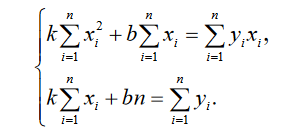

2) Чтобы найти a2, a1, a0, решим систему
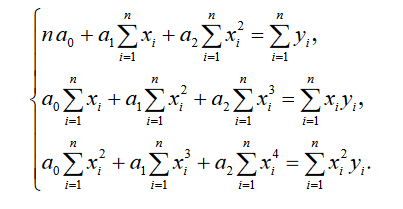

0.9999999999999997 -0.949999999999999


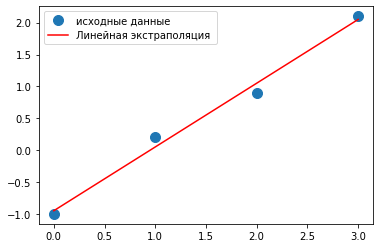

In [63]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + C как y = Ap, где А = [[ x 1 ]] и p = [[m], [c]]
# Построим A по Х:

A = np.vstack([x,np.ones(len(x))]).T
A # print забыли

# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'исходные данные', markersize= 10)

plt.plot(x, m*x + c, 'r',label = 'Линейная экстраполяция ')
plt.legend()
plt.show()